<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./12_stratospheric_ozone_2020_GOME-2_workflow"><< 12 - Stratospheric Ozone 2020 - GOME-2 Level-2 Exercise</a><span style="float:right;"><a href="./22_stratospheric_ozone_2020_IASI_exercise.ipynb">22 - Stratospheric Ozone 2020 - IASI Level-2 Exercise >></a></span>

<div class="alert alert-block alert-warning">
<b>STRATOSPHERIC OZONE - WORKFLOW</b></div>

<hr>

# Metop-A, -B, -C IASI Level-2 - Arctic Ozone hole

This case study showcases the preparation of IASI GOME-2 Level-2 data to analyse and animate the Arctic ozone hole in March 2020. 

* [Arctic Ozone hole 2020 - Workflow](#arctic_21)
  * [Load Metop-A/B/C IASI Total Column Ozone Level-2 data and aggregate it](#load_21)
  * [Binning of Metop-A/B/C IASI Level-2 data onto a regular two-dimensional grid](#gridding_21)
  * [*Optional: Loop through all the folders of Metop-A/B/C IASI Level-2 data and create daily gridded netCDF files*](#optional_loop_21)
  * [Animate daily gridded Metop-A/B/C IASI Level-2 Ozone information for each day in March 2020](#animate_21) 

<br>

#### Load required libraries

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import ipynb

from netCDF4 import Dataset
import pandas as pd


from matplotlib import animation

from IPython.display import HTML
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

<br>

#### Load helper functions

In [4]:
%run ./functions.ipynb

<hr>

# <a id='arctic_21'></a>Arctic Ozone hole 2020 - Workflow

## <a id='load_21'></a>Load Metop-A/B/C IASI Total Column Ozone Level 2 data and aggregate it

The [Infrared Atmospheric Sounding Interferometer (IASI)](https://www.eumetsat.int/website/home/Satellites/CurrentSatellites/Metop/MetopDesign/IASI/index.html) is an instrument onboard the Metop-A/B/C satellites. It provides information on the vertical structure of temperature and humidity as well as main atmospheric species.

IASI data are distributed via:
- the [EUMETSAT data centre (Earth Observation Portal)](https://eoportal.eumetsat.int/userMgmt/register.faces), and
- external services, e.g. [AERIS](https://www.aeris-data.fr/).

IASI Level-2 data are originally disseminated in `BUFR` format. To download the data in `netCDF` format, visit the [IASI portal](https://iasi.aeris-data.fr/), which is implemented by AERIS. You can use the Python library [xarray](http://xarray.pydata.org/en/stable/index.html) to access and manipulate datasets in `netCDF` format.

The following workflow uses data from the `Ozone (O`<sub>`3`</sub>`) total column` dataset.

#### Load daily Metop-A/B/C IASI Total Column Ozone Level-2 data as `xarray.DataArray`

The function `open_dataset` in `xarray` enables you to open a `netCDF` file. Once loaded, you can inspect the data structure of the `IASI` data disseminated by the IASI portal. There is a separate `netcdf` file for each day's data for Metop-A/B/C. Let's open a file from 2nd March 2020. 

As you can see, the data is a one-dimensional vector with more than 103,000 individual data points. `latitude`, `longitude` and other parameters are stored as individual data variables.

#### <a id='step1'></a>Load the Metop-A IASI Level-2 data

In [5]:
file_name_2a = './eodata/iasi/o3/2a/2020/03/IASI_METOPA_L2_O3_COLUMN_20200302_ULB-LATMOS_V6.5.0.nc'
file_2a = xr.open_dataset(file_name_2a)
file_2a

<xarray.Dataset>
Dimensions:                             (time: 103703)
Coordinates:
  * time                                (time) float64 4.155e+08 ... 4.156e+08
Data variables:
    time_string                         (time) |S16 ...
    time_in_day                         (time) float64 ...
    latitude                            (time) float32 ...
    longitude                           (time) float32 ...
    solar_zenith_angle                  (time) float32 ...
    satellite_zenith_angle              (time) float32 ...
    orbit_number                        (time) int64 ...
    scanline_number                     (time) int32 ...
    pixel_number                        (time) int32 ...
    ifov_number                         (time) int32 ...
    retrieval_quality_flag              (time) int32 ...
    surface_altitude                    (time) float32 ...
    tropopause_altitude                 (time) float32 ...
    O3_total_column                     (time) float32 ...
    O3_total_column_error               (time) float32 ...
    O3_tropospheric_column              (time) float32 ...
    O3_tropospheric_column_error        (time) float32 ...
    O3_surface_6km_column               (time) float32 ...
    O3_surface_6km_column_error         (time) float32 ...
    O3_total_degrees_of_freedom         (time) float32 ...
    O3_tropospheric_degrees_of_freedom  (time) float32 ...
    O3_surface_6km_degrees_of_freedom   (time) float32 ...
Attributes:
    title:                       IASI/METOPA ULB-LATMOS ozone (O3) L2 product...
    institution:                 ULB-LATMOS for algorithm development ; EUMET...
    product_version:             6.5.0
    history:                     2020-11-09 22:53:42 (date of data extraction...
    summary:                     This dataset contains Level 2 ozone column p...
    source:                      EUMETSAT IASI Level 2 ozone (O3) data versio...
    references:                  Reference to the O3 retrieval: FORLI radiati...
    id:                          IASI_METOPA_L2_CO_COLUMN_20200302_ULB-LATMOS...
    tracking_id:                 07e02814-22d6-11eb-baca-002590591942
    geospatial_lat_min:          -90.0
    geospatial_lat_max:          +90.0
    geospatial_latitude_units:   degrees_north
    geospatial_lon_min:          -180.0
    geospatial_lon_max:          +180.0
    geospatial_longitude_units:  degrees_east
    geospatial_vertical_min:     0
    geospatial_vertical_max:     60
    geospatial_vertical_units:   km
    time_coverage_start:         20191201T000000Z
    time_coverage_end:           20191201T235959Z
    conventions:                 CF-1.6
    standard_name_vocabulary:    NetCDF Climate and Forecast (CF) Medata Conv...
    keywords:                    satellite,observation,atmosphere,ozone,O3,le...
    keywords_vocabulary:         GCMD Science Keywords
    platform:                    Metop-A
    sensor:                      IASI
    spatial_resolution:          12km at nadir
    creator_type:                institution
    creator_name:                ULB-LATMOS
    contact_email:               contact form at http://iasi.aeris-data.fr/co...
    data_policy:                 see https://iasi.aeris-data.fr/data-use-policy/

<br>

#### Load the Metop-B IASI Level-2 data

We repeat the same procedure as above for the IASI Level-2 Ozone data files from the Metop-B satellite. Metop-B data files are in the folder directory `./eodata/iasi/o3/2b/2020/03/`.

In [6]:
file_name_2b = './eodata/iasi/o3/2b/2020/03/IASI_METOPB_L2_O3_COLUMN_20200302_ULB-LATMOS_V6.5.0.nc'
file_2b = xr.open_dataset(file_name_2b)
file_2b

<xarray.Dataset>
Dimensions:                             (time: 103113)
Coordinates:
  * time                                (time) float64 4.155e+08 ... 4.156e+08
Data variables:
    time_string                         (time) |S16 ...
    time_in_day                         (time) float64 ...
    latitude                            (time) float32 ...
    longitude                           (time) float32 ...
    solar_zenith_angle                  (time) float32 ...
    satellite_zenith_angle              (time) float32 ...
    orbit_number                        (time) int64 ...
    scanline_number                     (time) int32 ...
    pixel_number                        (time) int32 ...
    ifov_number                         (time) int32 ...
    retrieval_quality_flag              (time) int32 ...
    surface_altitude                    (time) float32 ...
    tropopause_altitude                 (time) float32 ...
    O3_total_column                     (time) float32 ...
    O3_total_column_error               (time) float32 ...
    O3_tropospheric_column              (time) float32 ...
    O3_tropospheric_column_error        (time) float32 ...
    O3_surface_6km_column               (time) float32 ...
    O3_surface_6km_column_error         (time) float32 ...
    O3_total_degrees_of_freedom         (time) float32 ...
    O3_tropospheric_degrees_of_freedom  (time) float32 ...
    O3_surface_6km_degrees_of_freedom   (time) float32 ...
Attributes:
    title:                       IASI/METOPB ULB-LATMOS ozone (O3) L2 product...
    institution:                 ULB-LATMOS for algorithm development ; EUMET...
    product_version:             6.5.0
    history:                     2020-11-09 22:54:18 (date of data extraction...
    summary:                     This dataset contains Level 2 ozone column p...
    source:                      EUMETSAT IASI Level 2 ozone (O3) data versio...
    references:                  Reference to the O3 retrieval: FORLI radiati...
    id:                          IASI_METOPB_L2_CO_COLUMN_20200302_ULB-LATMOS...
    tracking_id:                 1d8868a2-22d6-11eb-81a2-002590591942
    geospatial_lat_min:          -90.0
    geospatial_lat_max:          +90.0
    geospatial_latitude_units:   degrees_north
    geospatial_lon_min:          -180.0
    geospatial_lon_max:          +180.0
    geospatial_longitude_units:  degrees_east
    geospatial_vertical_min:     0
    geospatial_vertical_max:     60
    geospatial_vertical_units:   km
    time_coverage_start:         20191201T000000Z
    time_coverage_end:           20191201T235959Z
    conventions:                 CF-1.6
    standard_name_vocabulary:    NetCDF Climate and Forecast (CF) Medata Conv...
    keywords:                    satellite,observation,atmosphere,ozone,O3,le...
    keywords_vocabulary:         GCMD Science Keywords
    platform:                    Metop-B
    sensor:                      IASI
    spatial_resolution:          12km at nadir
    creator_type:                institution
    creator_name:                ULB-LATMOS
    contact_email:               contact form at http://iasi.aeris-data.fr/co...
    data_policy:                 see https://iasi.aeris-data.fr/data-use-policy/

<br>

#### Load the Metop-C IASI Level-2 data

And the same procedure is repeated again for the IASI Level-2 Ozone data files of Metop-C. The data files are in the folder directory `./eodata/iasi/o3/2c/2020/03/`.

In [7]:
file_name_2c = './eodata/iasi/o3/2c/2020/03/IASI_METOPC_L2_O3_COLUMN_20200302_ULB-LATMOS_V6.5.0.nc'
file_2c = xr.open_dataset(file_name_2c)
file_2c

<xarray.Dataset>
Dimensions:                             (time: 58157)
Coordinates:
  * time                                (time) float64 4.155e+08 ... 4.156e+08
Data variables:
    time_string                         (time) |S16 ...
    time_in_day                         (time) float64 ...
    latitude                            (time) float32 ...
    longitude                           (time) float32 ...
    solar_zenith_angle                  (time) float32 ...
    satellite_zenith_angle              (time) float32 ...
    orbit_number                        (time) int64 ...
    scanline_number                     (time) int32 ...
    pixel_number                        (time) int32 ...
    ifov_number                         (time) int32 ...
    retrieval_quality_flag              (time) int32 ...
    surface_altitude                    (time) float32 ...
    tropopause_altitude                 (time) float32 ...
    O3_total_column                     (time) float32 ...
    O3_total_column_error               (time) float32 ...
    O3_tropospheric_column              (time) float32 ...
    O3_tropospheric_column_error        (time) float32 ...
    O3_surface_6km_column               (time) float32 ...
    O3_surface_6km_column_error         (time) float32 ...
    O3_total_degrees_of_freedom         (time) float32 ...
    O3_tropospheric_degrees_of_freedom  (time) float32 ...
    O3_surface_6km_degrees_of_freedom   (time) float32 ...
Attributes:
    title:                       IASI/METOPC ULB-LATMOS ozone (O3) L2 product...
    institution:                 ULB-LATMOS for algorithm development ; EUMET...
    product_version:             6.5.0
    history:                     2020-11-09 22:49:58 (date of data extraction...
    summary:                     This dataset contains Level 2 ozone column p...
    source:                      EUMETSAT IASI Level 2 ozone (O3) data versio...
    references:                  Reference to the O3 retrieval: FORLI radiati...
    id:                          IASI_METOPC_L2_CO_COLUMN_20200302_ULB-LATMOS...
    tracking_id:                 82657a0e-22d5-11eb-8c0a-002590591942
    geospatial_lat_min:          -90.0
    geospatial_lat_max:          +90.0
    geospatial_latitude_units:   degrees_north
    geospatial_lon_min:          -180.0
    geospatial_lon_max:          +180.0
    geospatial_longitude_units:  degrees_east
    geospatial_vertical_min:     0
    geospatial_vertical_max:     60
    geospatial_vertical_units:   km
    time_coverage_start:         20191201T000000Z
    time_coverage_end:           20191201T235959Z
    conventions:                 CF-1.6
    standard_name_vocabulary:    NetCDF Climate and Forecast (CF) Medata Conv...
    keywords:                    satellite,observation,atmosphere,ozone,O3,le...
    keywords_vocabulary:         GCMD Science Keywords
    platform:                    Metop-C
    sensor:                      IASI
    spatial_resolution:          12km at nadir
    creator_type:                institution
    creator_name:                ULB-LATMOS
    contact_email:               contact form at http://iasi.aeris-data.fr/co...
    data_policy:                 see https://iasi.aeris-data.fr/data-use-policy/

<br>

### Generate a `xarray.DataArray` with latitude and longitude as coordinates

With the help of the function [generate_xr_from_1D_vec](./functions.ipynb#generate_xr_from_1D_vec), you can generate a `xarray.DataArray` object, with `latitude` and `longitude` values as coordinates and the `O3_total_column` information as data values. This data structure will be helpful for plotting the data.

#### Generate a `DataArray` for the Metop-A IASI Level-2 data

In [8]:
o3=file_2a['O3_total_column']
o3_da_2a = generate_xr_from_1D_vec(file=file_2a, 
                                    lat_path='latitude', 
                                    lon_path='longitude', 
                                    variable=o3, 
                                    parameter_name=o3.standard_name, 
                                    longname=file_2a.title,
                                    no_of_dims=1, 
                                    unit='mol m-2')
o3_da_2a

<xarray.DataArray 'atmosphere_mole_content_of_ozone' (ground_pixel: 103703)>
array([0.14059614, 0.1337306 , 0.11926492, ..., 0.11992135, 0.11931682,
       0.11849383], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 -57.936203 -59.199898 ... 16.853203
    longitude  (ground_pixel) float32 -35.2415 -47.925903 ... -44.055 -40.5783
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  IASI/METOPA ULB-LATMOS ozone (O3) L2 products (total, troposp...
    units:      mol m-2

<br>

#### Generate a `DataArray` for the Metop-B IASI Level-2 data

We repeat the same procedure as above for the IASI Level-2 Ozone data files from the Metop-B satellite.

In [9]:
o3=file_2b['O3_total_column']
o3_da_2b = generate_xr_from_1D_vec(file=file_2b, 
                                    lat_path='latitude', 
                                    lon_path='longitude',
                                    variable=o3, 
                                    parameter_name=o3.standard_name, 
                                    longname=o3.long_name, 
                                    no_of_dims=1, 
                                    unit=o3.units)
o3_da_2b

<xarray.DataArray 'atmosphere_mole_content_of_ozone' (ground_pixel: 103113)>
array([0.11719738, 0.11776557, 0.12187552, ..., 0.1480506 , 0.15259217,
       0.13809413], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 32.1895 31.9618 ... 68.2897 69.1671
    longitude  (ground_pixel) float32 -46.9945 -47.1699 ... 179.5974 176.21289
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved ozone total column in mole/m2
    units:      mol m-2

<br>

#### Generate a `DataArray` for the Metop-C IASI Level-2 data

Finally, the same procedure is repeated again for the IASI Level-2 Ozone data files of Metop-C.

In [10]:
o3=file_2c['O3_total_column']
o3_da_2c = generate_xr_from_1D_vec(file=file_2c, 
                                    lat_path='latitude', 
                                    lon_path='longitude',
                                    variable=o3, 
                                    parameter_name=o3.standard_name, 
                                    longname=o3.long_name, 
                                    no_of_dims=1, 
                                    unit=o3.units)
o3_da_2c

<xarray.DataArray 'atmosphere_mole_content_of_ozone' (ground_pixel: 58157)>
array([0.13296795, 0.12760633, 0.12409223, ..., 0.14644556, 0.14993691,
       0.14032567], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 -63.958603 -64.5126 ... -73.0088 -69.768
    longitude  (ground_pixel) float32 -57.185402 -56.8106 ... 23.456299 28.3666
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved ozone total column in mole/m2
    units:      mol m-2

<br> 

#### Combine the three O<sub>3</sub> data arrays from Metop-A, Metop-B and Metop-C with `xarray.concat`

Now, we can concatenate all the `xarray.DataArrays` from Metop-A, Metop-B and Metop-C into one single `DataArray`. You can use the function `xarray.concat` for it and use the dimension `ground_pixel` as concatenation dimension.

In [11]:
data_abc = xr.concat([o3_da_2a,o3_da_2b,o3_da_2c],dim='ground_pixel')
data_abc

<xarray.DataArray 'atmosphere_mole_content_of_ozone' (ground_pixel: 264973)>
array([0.14059614, 0.1337306 , 0.11926492, ..., 0.14644556, 0.14993691,
       0.14032567], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 -57.936203 -59.199898 ... -73.0088 -69.768
    longitude  (ground_pixel) float32 -35.2415 -47.925903 ... 23.456299 28.3666
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  IASI/METOPA ULB-LATMOS ozone (O3) L2 products (total, troposp...
    units:      mol m-2

<br>

#### Convert from molecules per metre square to Dobson Unit by applying a multiplication factor

The unit of the data is `molecules per metre square`. Ozone is often expressed in Dobson Units, so we will convert the units to Dobson Units instead. `Molecules per metre square` can be converted to `Dobson Unit [DU]` by multiplying the values with 2241.147. We then have to reassign the attributes to the resulting data array because they got dropped when we did the multiplication step. Finally, we change the units stored in the attributes to `Dobson Unit`.

In [12]:
# Convert to Dobson Units
data_abc_du = data_abc * 2241.147

# Add the attributes back
data_abc_du.attrs = data_abc.attrs

# Change units label to Dobson Unit
data_abc_du.attrs['units'] = 'Dobson Unit'

data_abc_du

<xarray.DataArray 'atmosphere_mole_content_of_ozone' (ground_pixel: 264973)>
array([315.09662, 299.70993, 267.2902 , ..., 328.20602, 336.03067,
       314.49045], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 -57.936203 -59.199898 ... -73.0088 -69.768
    longitude  (ground_pixel) float32 -35.2415 -47.925903 ... 23.456299 28.3666
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  IASI/METOPA ULB-LATMOS ozone (O3) L2 products (total, troposp...
    units:      Dobson Unit

<br>

## <a id='gridding_21'></a>Bin the Metop-A/B/C IASI data

### Binning of Metop-A/B/C IASI Level-2 data onto a regular two-dimensional grid

The next step is to bring the ground pixel information of the `data_abc_du` array onto a regular two-dimensional grid. This process is called *binning*. In preparation, you store the data values of `latitude`, `longitude` and `ozone` as variables x, y, z.

In [13]:
y = data_abc_du.latitude.data
x = data_abc_du.longitude.data
z = data_abc_du.data

<br>

#### Bin the data onto a 2D-grid with `np.histogram2d`

With `np.histogram2d`, you can bin the data onto a pre-defined two-dimensional grid (called bins). By assigning the data value object `z` to the keyword argument `weights`, the bin gets assigned the data value of the point that falls into the cell.

Since there will be more data points assigned to one cell (bin), you also have to create a `counts` array, which sums up the number of data points fallen into a bin. With this `counts` array, you can build the arithmetic mean of all the data points fallen into a bin.

The example below builds a regular grid of 1 deg x 1 deg.

In [14]:
zi, yi, xi = np.histogram2d(y, x, bins=(180,360), weights=z, normed=False)
counts, _, _ = np.histogram2d(y, x, bins=(180,360))
    
zi = zi / counts
zi

array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ..., 343.28157043,
        438.94633484,          nan],
       [         nan,          nan, 424.44210815, ..., 409.49597168,
        426.99952698,          nan],
       ...,
       [         nan, 291.28410848, 301.38366699, ..., 308.05096436,
        291.55856323, 312.65161133],
       [289.81881714, 281.41409302, 292.30010986, ..., 288.64167786,
        301.0194397 , 296.0308075 ],
       [285.70767212,          nan, 299.15966797, ...,          nan,
                 nan, 298.47039795]])

You can create a `xarray.DataArray` from the binned information, which gives you flexibility in further handling the regularly gridded ozone values.

<br>

#### Create a `xarray.DataArray` of the regular gridded Ozone information

You can create a `xarray.DataArray` with the constructor `DataArray()`. Define the array with two dimensions, `latitude` and `longitude`, but add `time` as an additional coordinate information.

In [15]:
xarray_abc = xr.DataArray(
                zi,
                dims=['latitude','longitude'],
                coords={
                    'time': pd.to_datetime('2020-03-02'),
                    'latitude':(['latitude'], yi[:-1]),
                    'longitude':(['longitude'],xi[:-1])
                },
                attrs={'long_name': data_abc_du.long_name, 'units': data_abc_du.units},
                name='O3'
            )

xarray_abc

<xarray.DataArray 'O3' (latitude: 180, longitude: 360)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ..., 343.28157043,
        438.94633484,          nan],
       [         nan,          nan, 424.44210815, ..., 409.49597168,
        426.99952698,          nan],
       ...,
       [         nan, 291.28410848, 301.38366699, ..., 308.05096436,
        291.55856323, 312.65161133],
       [289.81881714, 281.41409302, 292.30010986, ..., 288.64167786,
        301.0194397 , 296.0308075 ],
       [285.70767212,          nan, 299.15966797, ...,          nan,
                 nan, 298.47039795]])
Coordinates:
    time       datetime64[ns] 2020-03-02
  * latitude   (latitude) float64 -89.79 -88.79 -87.8 ... 86.77 87.76 88.76
  * longitude  (longitude) float64 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
Attributes:
    long_name:  IASI/METOPA ULB-LATMOS ozone (O3) L2 products (total, troposp...
    units:      Dobson Unit

<br>

## <a id='visualize_21'></a>Visualize the Metop-A/B/C IASI data on the Arctic

#### Visualize the data array in an `Orthographic()` projection with the function `visualize_pcolormesh`

The final step is to visualize the gridded data with the function [visualize_pcolormesh](./functions.ipynb#visualize_pcolormesh).

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Retrieved Ozone total column in DU for 2 March 2020 (IASI Level-2)'}>)

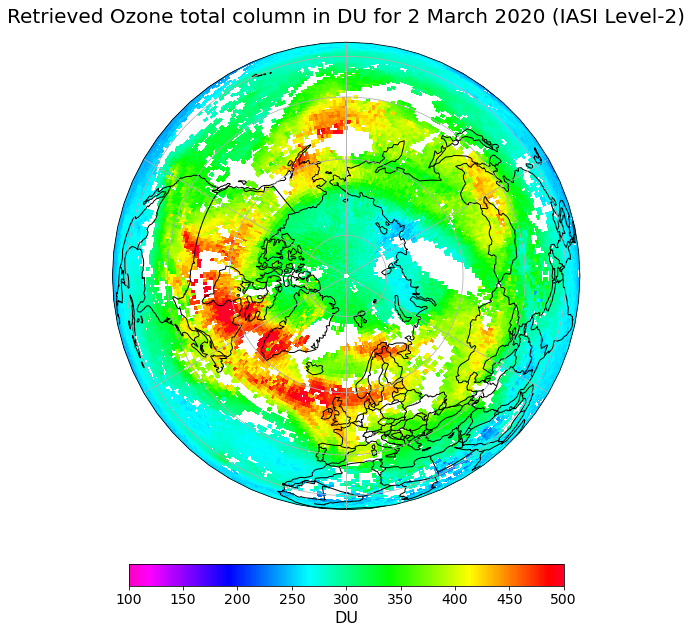

In [16]:
visualize_pcolormesh(data_array=xarray_abc, 
                     longitude=xarray_abc.longitude, 
                     latitude=xarray_abc.latitude, 
                     projection=ccrs.Orthographic(0,90), 
                     color_scale='gist_rainbow_r', 
                     unit='DU', 
                     long_name='Retrieved Ozone total column in DU for 2 March 2020 (IASI Level-2)', 
                     vmin=100, 
                     vmax=500)

<br>

#### Regrid data onto a custom 1 x 1 degree regular grid with `xarray.groupby_bins`

There is one additional step required, in order to bring multiple daily files onto the same regular grid. Without this step, each gridded data set would have its own grid definition and it would be not possible to animate the daily files in a coherent way.

For this reason, the next step defines a custom 1 x 1 degree regular grid and regrids the Ozone information onto the custom grid. You have to specify the custom grid information for both, latitude and longitude information.
You can use xarray's function `groupby_bins()` to regrid the Ozone values onto the specified grid.

With xarray's function `to_netcdf()`, you can save the gridded Ozone information for 2 March 2020 as a `netCDF` file.

In [17]:
lat_bins = np.arange(-90,90+(1/2),1)
lon_bins = np.arange(-180,180+(1/2), 1)

# define a label for each bin corresponding to the central latitude
lat_center = np.arange(-90+(1/2),90,1)
lon_center = np.arange(-180+(1/2),180,1)

# Bring Ozone values onto a regular latitude grid and create the average of multiple values per cell
tmp_regrid_lat = xarray_abc.groupby_bins('latitude', lat_bins, labels=lat_center).mean()
# Bring Ozone values onto a regular longitude grid
tmp_regrid = tmp_regrid_lat.groupby_bins('longitude', lon_bins, labels=lon_center).mean()

day = pd.to_datetime('2020-03-02')

# Save the gridded Ozone data as netCDF data file
tmp_regrid.to_netcdf('IASI_'+day.strftime('%Y-%m-%d')+'.nc')

<br> 

## <a id='optional_loop_21'></a>*Optional: Loop through all the folders of Metop-A/B/C IASI Level-2 data and create daily gridded netCDF files*

The aim is to animate the Ozone hole development during March 2020. For this reason, we combine the individual steps from above in a for loop and create for each day in March 2020 a daily file of regular gridded Ozone information.

The individual steps are the following:
* Load the Ozone information as `xarray.DataArray` for the three satellites Metop-A, -B and -C and concatenate the data arrays
* Convert the units of the data to Dobson Unit
* Bring the Ozone information onto a regular 1 x 1 degree grid
* Regrid the gridded Ozone information onto a custom defined regular grid
* Save the daily gridded Ozone information as a netCDF file


Note: the loop below takes a bit of time, as we go through many data files. For this reason, executing the loop is optional. The daily gridded Ozone information for each day in March 2020 are already available to be loaded directly. Thus, you can jump directly to the next step.

In [19]:
directory_2a = './eodata/iasi/o3/2a/2020/03/'
file_list_2a = os.listdir(directory_2a)
file_list_2a.sort()

directory_2b = './eodata/iasi/o3/2b/2020/03/'
file_list_2b = os.listdir(directory_2b)
file_list_2b.sort()

directory_2c = './eodata/iasi/o3/2c/2020/03/'
file_list_2c = os.listdir(directory_2c)
file_list_2c.sort()

for file in file_list_2c[1:]:
    
    # Modify file names according to which satellite is the source
    file_a = file.replace("METOPC", "METOPA")
    file_b = file.replace("METOPC", "METOPB")
    
    # Create file paths
    file_path_a = os.path.join(directory_2a,file_a)
    file_path_b = os.path.join(directory_2b,file_b)
    file_path_c = os.path.join(directory_2c,file)
    
    # Open datasets
    file_2a = xr.open_dataset(file_path_a)
    file_2b = xr.open_dataset(file_path_b)
    file_2c = xr.open_dataset(file_path_c)

    # Generate xarray DataArrays
    data_array_a = generate_xr_from_1D_vec(file=file_2a, 
                                lat_path='latitude', 
                                lon_path='longitude',
                                variable=file_2a['O3_total_column'], 
                                parameter_name='o3', 
                                longname=file_2a.title,
                                no_of_dims=1, 
                                unit='mol m-2')

    data_array_b = generate_xr_from_1D_vec(file=file_2b, 
                                lat_path='latitude', 
                                lon_path='longitude',
                                variable=file_2b['O3_total_column'], 
                                parameter_name='o3', 
                                longname=file_2b.title,
                                no_of_dims=1, 
                                unit='mol m-2')

    data_array_c = generate_xr_from_1D_vec(file=file_2c, 
                                lat_path='latitude', 
                                lon_path='longitude',
                                variable=file_2c['O3_total_column'], 
                                parameter_name='o3', 
                                longname=file_2c.title,
                                no_of_dims=1, 
                                unit='mol m-2')

    # Concatenate DataArrays
    data_abc = xr.concat([data_array_a,data_array_b,data_array_c],dim='ground_pixel')

    # Convert units to Dobson Unit
    data_abc_du = data_abc * 2241.147

    # Add the attributes back
    data_abc_du.attrs = data_abc.attrs

    # Change units label to Dobson Unit
    data_abc_du.attrs['units'] = 'Dobson Unit'

    # Binning of Ozone information onto a regular 1 x 1 degree grid and organize the gridded information as a xarray.DataArray()
    y = data_abc_du.latitude.data
    x = data_abc_du.longitude.data
    z = data_abc_du.data

    zi, yi, xi = np.histogram2d(y, x, bins=(180,360), weights=z, normed=False)
    counts, _, _ = np.histogram2d(y, x, bins=(180,360))

    zi = zi / counts
    zi

    day = pd.to_datetime('2020-03-'+file_path_c[59:61]) # file_path_c[59:61] extracts the day date from the filename e.g. '10' or '02'

    xarray_abc_new = xr.DataArray(
            zi,
            dims=['latitude','longitude'],
            coords={
                'time': day,
                'latitude':(['latitude'], yi[:-1]),
                'longitude':(['longitude'],xi[:-1])
            },
            attrs={'long_name': data_abc_du.long_name, 'units': data_abc_du.units},
            name='O3'
        )

    # Create the bins based on a 0.036 x 0.036 grid
    lat_bins = np.arange(-90,90+(1/2),1)
    lon_bins = np.arange(-180,180+(1/2), 1)

    # define a label for each bin corresponding to the central latitude
    lat_center = np.arange(-90+(1/2),90,1)
    lon_center = np.arange(-180+(1/2),180,1)

    # Bring the ozone values onto a regular latitude grid and create the average of multiple values per cell
    tmp_regrid_lat = xarray_abc_new.groupby_bins('latitude', lat_bins, labels=lat_center).mean()
    # Bring the ozone values onto a regular longitude grid
    tmp_regrid = tmp_regrid_lat.groupby_bins('longitude', lon_bins, labels=lon_center).mean()

    tmp_regrid.to_netcdf('./'+'IASI_'+day.strftime('%Y-%m-%d')+'.nc')

<br>

## <a id='animate_21'></a>Animate daily gridded Metop-A/B/C IASI Ozone information for each day in March 2020

#### Open daily gridded Ozone files for March 2020 with `xarray.open_mfdataset`

Let us now open the generated daily gridded Ozone information for March 2020 and store them as one single `xarray.Dataset`. You can use xarray's function `open_mfdataset()`, which allows the generation of a `xarray.Dataset` on the basis of multiple netCDF files. You have to provide the function the dimension you want to concatenate the files on. In this case, you want to combine the files based on the `time` dimension.

In [ ]:
o3_daily = xr.open_mfdataset('./eodata/iasi/o3/abc/03/IASI_2020-03*.nc', concat_dim='time', combine='nested')

<br>

The next step is to load the Ozone variable from the `xarray.Dataset` above.

In [21]:
o3 = o3_daily.O3
o3

<xarray.DataArray 'O3' (time: 30, latitude_bins: 180, longitude_bins: 360)>
dask.array<concatenate, shape=(30, 180, 360), dtype=float64, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude_bins  (longitude_bins) float64 -179.5 -178.5 ... 178.5 179.5
  * latitude_bins   (latitude_bins) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * time            (time) datetime64[ns] 2020-03-02 2020-03-03 ... 2020-03-31

<br>

#### Visualize `Ozone` with `pcolormesh`

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'IASI Gridded Level-3 data of tropospheric column density of Ozone for\n2020-03-28'}>)

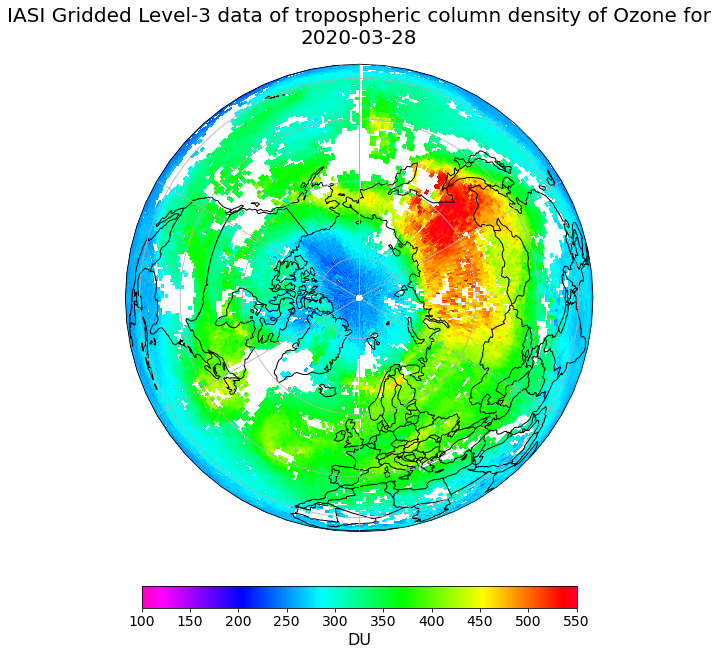

In [50]:
# Extract the date
date0 = str(o3.time[26].data)[0:10]

# Visualize with pcolormesh
visualize_pcolormesh(data_array=o3[26,:,:], 
                     longitude=o3.longitude_bins, 
                     latitude=o3.latitude_bins, 
                     projection=ccrs.Orthographic(0,90), 
                     color_scale='gist_rainbow_r', 
                     unit='DU', 
                     long_name='IASI Gridded Level-3 data of tropospheric column density of Ozone for\n'  + date0, 
                     vmin=100, 
                     vmax=550)

<br>

### Animate `Ozone` over Arctic for March 2020

The animation function consists of 4 parts:
- **Setting the initial state:**<br>
 Here, you define the general plot your animation shall use to initialise the animation. You can also define the number of frames (time steps) your animation shall have.
 
 
- **Function to animate:**<br>
 The `animate()` function updates the `pcolormesh` drawn on the axes for the given number of frames. We have one frame per time step. 
 
- **Create a `animate.FuncAnimation` object:** <br>
 The functions defined before are now combined to build an `animate.FuncAnimation` object.
 
 
- **Play the animation as video:**<br>
 As a final step, you can integrate the animation into the notebook with the `HTML` class. You take the generated `animate.FuncAnimation` object and convert it to a HTML5 video with the function `to_html5_video`.

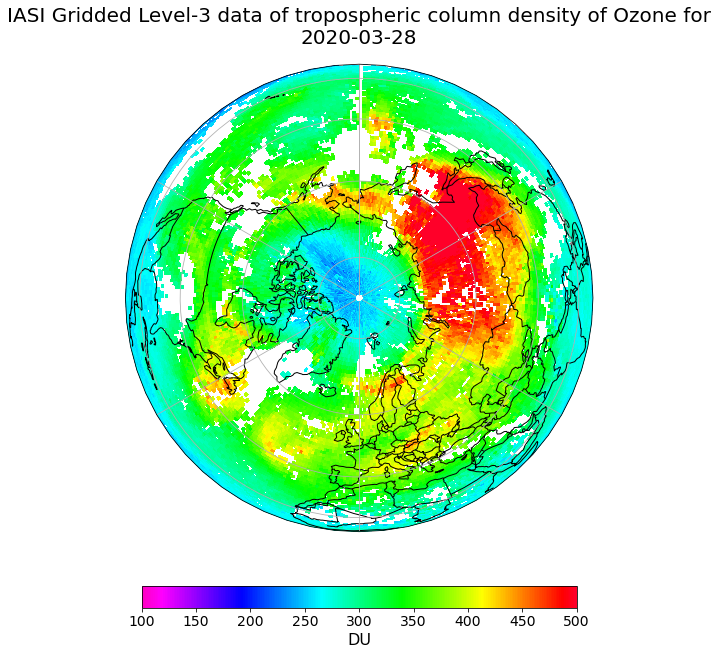

In [44]:
# Setting the initial state
date0 = str(o3.time[0].data)[0:10]
title = 'IASI Gridded Level-3 data of tropospheric column density of Ozone for\n' + date0

fig, ax = visualize_pcolormesh(data_array=o3[0,:,:], 
                     longitude=o3.longitude_bins, 
                     latitude=o3.latitude_bins, 
                     projection=ccrs.Orthographic(0,90), 
                     color_scale='gist_rainbow_r', 
                     unit='DU', 
                     long_name=title, 
                     vmin=100, 
                     vmax=500)

# Define the number of frames (the number of days from 2nd March to 31st March).
frames = 30

# Define the animation function that updates the pcolormesh on the axis
def animate(i):
    date = str(o3.time[i].data)[0:10]
    
    img = ax.pcolormesh(o3.longitude_bins, o3.latitude_bins, o3[i,:,:], 
                        cmap=plt.get_cmap('gist_rainbow_r'), transform=ccrs.PlateCarree(),
                        vmin=100,
                        vmax=500,
                        shading='auto')
    ax.set_title('IASI Gridded Level-3 data of tropospheric column density of Ozone for\n' + date, fontsize=20, pad=20.0)
    
    return img

In [43]:
#Create a animate.FuncAnimation object
ani = animation.FuncAnimation(fig, animate, frames, interval=800, blit=False, repeat=True)

plt.show(block = False)

# Play the animation as a video
HTML(ani.to_html5_video())

<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./12_stratospheric_ozone_2020_GOME-2_workflow"><< 12 - Stratospheric Ozone 2020 - GOME-2 Level-2 Exercise</a><span style="float:right;"><a href="./22_stratospheric_ozone_2020_IASI_exercise.ipynb">22 - Stratospheric Ozone 2020 - IASI Level-2 Exercise >></a></span>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="./LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>